DATA PREPARATION


linear algebra

In [1]:
import numpy as np 
# data processing
import pandas as pd 
# os
import os
# Data Visualization
import matplotlib.pyplot as plt    
import seaborn as sns
os.chdir('C:\\Users\\Admin\\OneDrive\\Desktop\\Project\\Python\\Project')

In [2]:
os.getcwd()

'C:\\Users\\Admin\\OneDrive\\Desktop\\Project\\Python\\Project'

Import the dataset

In [3]:
# for importing the data from CSV "C:\Users\Admin\OneDrive\Desktop\Project\Python\Project\flights.csv"
# flight data
flights= pd.read_csv('flights.csv', low_memory=False)
airlines = pd.read_csv('airlines.csv')
airports = pd.read_csv('airports.csv')

#Checking the data of csv files
type(airlines)
print(airlines)
airlines.values
airlines.describe()

   IATA_CODE                       AIRLINE
0         UA         United Air Lines Inc.
1         AA        American Airlines Inc.
2         US               US Airways Inc.
3         F9        Frontier Airlines Inc.
4         B6               JetBlue Airways
5         OO         Skywest Airlines Inc.
6         AS          Alaska Airlines Inc.
7         NK              Spirit Air Lines
8         WN        Southwest Airlines Co.
9         DL          Delta Air Lines Inc.
10        EV   Atlantic Southeast Airlines
11        HA        Hawaiian Airlines Inc.
12        MQ  American Eagle Airlines Inc.
13        VX                Virgin America


,IATA_CODE,AIRLINE
count,14,14
unique,14,14
top,NK,Atlantic Southeast Airlines
freq,1,1


In [4]:
#merge flightsand airlines to replace Airline code with the actual airline/carrier name
flights= flights.merge(airlines, left_on='AIRLINE', right_on='IATA_CODE', how='inner')
# dropping old column and rename new one
flights= flights.drop(['AIRLINE_x','IATA_CODE'], axis=1)
flights= flights.rename(columns={"AIRLINE_y":"AIRLINE"})

In [5]:
# convert the month values to actual months
flights.loc[flights['MONTH'] == 1, 'MONTH'] = 'January'
flights.loc[flights['MONTH'] == 2, 'MONTH'] = 'February'
flights.loc[flights['MONTH'] == 3, 'MONTH'] = 'March'
flights.loc[flights['MONTH'] == 4, 'MONTH'] = 'April'
flights.loc[flights['MONTH'] == 5, 'MONTH'] = 'May'
flights.loc[flights['MONTH'] == 6, 'MONTH'] = 'June'
flights.loc[flights['MONTH'] == 7, 'MONTH'] = 'July'
flights.loc[flights['MONTH'] == 8, 'MONTH'] = 'August'
flights.loc[flights['MONTH'] == 9, 'MONTH'] = 'September'
flights.loc[flights['MONTH'] == 10, 'MONTH'] = 'October'
flights.loc[flights['MONTH'] == 11, 'MONTH'] = 'November'
flights.loc[flights['MONTH'] == 12, 'MONTH'] = 'December'
# converting cancellation reason to actual values
flights.loc[flights['CANCELLATION_REASON'] == 'A', 'CANCELLATION_REASON'] = 'Airline/Carrier'
flights.loc[flights['CANCELLATION_REASON'] == 'B', 'CANCELLATION_REASON'] = 'Weather'
flights.loc[flights['CANCELLATION_REASON'] == 'C', 'CANCELLATION_REASON'] = 'National Air System'
flights.loc[flights['CANCELLATION_REASON'] == 'D', 'CANCELLATION_REASON'] = 'Security'

DATA ANALYSIS

Analysis 1. What airline/carrier has the most number of flights?


"The airline  of flights is Southwest Airlines Co.    1261855 in total Numbers


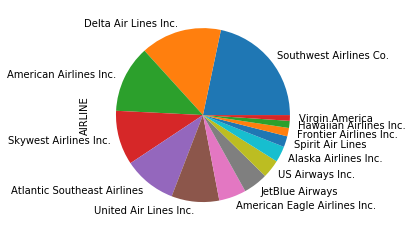

In [7]:
# Count the number of flights by airline/carrier
flights_by_airline = flights['AIRLINE'].value_counts()
# Display the airline/carrier with the most number of flights
print('"The airline  of flights is',flights_by_airline.nlargest(1).to_string(),'in total Numbers')
# For data visualization base on NUMBER OF FLIGHTS
flights_by_airline.plot.pie()

Analysis 2. Which month of the year has the most number of cancelled flights?

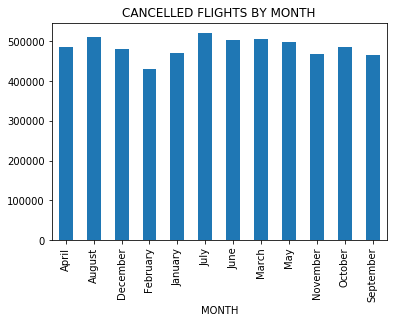

In [8]:
# This will display the month where most number of cancelled flights occur.
flights_grouped_sum = flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
flights_by_month = flights.groupby(by='MONTH')['CANCELLED'].agg('count')
flights_by_month.plot.bar(title='CANCELLED FLIGHTS BY MONTH')

Analysis 3. Which airline company has the least delayed flight average?

In [9]:
#Group by airline and count the values
flights_grouped_cnt = flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('count').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_CNT"})
# Sort delay count for each airline/carrier
flights_grouped_cnt_sort = flights_grouped_cnt.sort_values('ARRIVAL_DELAY_CNT',ascending=False)
# This will display which airline has the most number of cancelled flights
print('"The carrier/airline with the most number of delayed flights is',flights_grouped_cnt_sort['AIRLINE'].head(1).to_string(index=False).upper(),'"')


"The carrier/airline with the most number of delayed flights is  SOUTHWEST AIRLINES CO. "


Analysis 4. Which airline/carrier has the least average delay time?

In [10]:
# Group by airline and sum up / count the values
flights_grouped_sum = flights.groupby('AIRLINE', as_index= False)['ARRIVAL_DELAY'].agg('sum').rename(columns={"ARRIVAL_DELAY":"ARRIVAL_DELAY_SUM"})
# Merge two data sets to get the average delay time
flights_delayed_avg = flights_grouped_cnt.merge(flights_grouped_sum, left_on='AIRLINE', right_on='AIRLINE', how='inner')
flights_delayed_avg.loc[:,'AVG_DELAY_AIRLINE'] = flights_delayed_avg['ARRIVAL_DELAY_SUM'] / flights_delayed_avg['ARRIVAL_DELAY_CNT']
# Sort average delay time for each airline/carrier
flights_delayed_avg_sort = flights_delayed_avg.sort_values('AVG_DELAY_AIRLINE', ascending=True)
# This will display the airline with least average delay time
print('" The carrier/airline with the least average time of delayed flights is',flights_delayed_avg_sort['AIRLINE'].head(1).to_string(index=False).upper(),' "')

" The carrier/airline with the least average time of delayed flights is  ALASKA AIRLINES INC.  "


Analysis 5. What is the most common reason for flight cancellation?

"The reason for cancellation on most flights is Weather    48851 in total numbers "


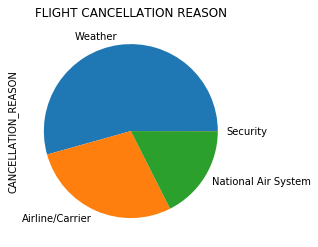

In [11]:
# Count the number of flights cancelled based on cancellation reason.
flights_cancellation = flights['CANCELLATION_REASON'].value_counts()
# Display the reason for cancellation on most number of flights.
print('"The reason for cancellation on most flights is',flights_cancellation.nlargest(1).to_string(),'in total numbers'' "')
# For data visualization base on CANCELLATION REASON
flights_cancellation.plot(kind='pie',title='FLIGHT CANCELLATION REASON')

Analysis 6. How many flights per month are delayed/cancelled for security reason?

In [12]:
#Create a subset of data that contain the number of flights cancelled for security reason. 
cancelled_due_to_sec = flights[flights['CANCELLATION_REASON'] == 'Security'].groupby('MONTH', as_index= False)['CANCELLATION_REASON'].agg('count').sort_values('CANCELLATION_REASON',ascending=False)
cancelled_due_to_sec


,MONTH,CANCELLATION_REASON
6,November,11
4,March,5
0,August,2
1,February,1
2,January,1
3,July,1
5,May,1


 Analysis  7. How many flights per week are delayed/cancelled due to the weather?

In [13]:
#Create a subset of data that contain the number of flights cancelled due to Weather. 
cancelled_due_to_weather = flights[flights['CANCELLATION_REASON'] == 'Weather'].groupby('MONTH', as_index= False)['CANCELLATION_REASON'].agg('count').sort_values('CANCELLATION_REASON',ascending=False)
cancelled_due_to_weather

,MONTH,CANCELLATION_REASON
3,February,15447
4,January,7020
7,March,6864
2,December,5613
6,June,3325
8,May,2780
9,November,2339
0,April,1789
1,August,1310
10,October,977


Analysis 8. How many flights per day are delayed/cancelled by the airline/carrier?

In [14]:
#Create a subset of data that contain the number of flights cancelled by Airline/Carrier. 
cancelled_by_airline = flights[flights['CANCELLATION_REASON'] == 'Airline/Carrier'].groupby('MONTH', as_index= False)['CANCELLATION_REASON'].agg('count').sort_values('CANCELLATION_REASON',ascending=False)
cancelled_by_airline

,MONTH,CANCELLATION_REASON
6,June,3619
4,January,2874
3,February,2815
5,July,2588
7,March,2494
1,August,2364
8,May,2007
0,April,1796
2,December,1579
11,September,1088


Analysis  9. How many flights per year are delayed/cancelled due to National Air System issue?

In [15]:
#Create a subset of data that contain the number of flights cancelled by National Air System. 
cancelled_by_nas = flights[flights['CANCELLATION_REASON'] == 'National Air System'].groupby('MONTH', as_index= False)['CANCELLATION_REASON'].agg('count').sort_values('CANCELLATION_REASON',ascending=False)
cancelled_by_nas


,MONTH,CANCELLATION_REASON
3,February,2254
6,June,2176
4,January,2087
7,March,1639
1,August,1376
5,July,1335
9,November,1164
0,April,935
8,May,906
2,December,871


Analysis 10.What are the top 10 airline/carrier by delay on average?

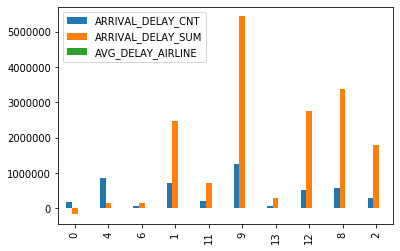

In [16]:
# Sorted data average delay time for each airline/carrier to show top 10
flights_delayed_avg_sort.head(10).plot.bar()


******************* Thank You *********************